In [100]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support, plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools
import time
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [101]:
df = pd.read_csv('../../../final_product/data/latest_data.csv')
df.head()

,Unnamed: 0,backers_count,category,country_displayable_name,created_at,deadline,goal_convert,id,launched_at,pledged,staff_pick,state,usd_pledged,sub_category,blurb_length,launch_to_deadline,creation_to_launch,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time
0,43,46,food,the United States,6/15/17 13:11,6/30/17 18:19,1000.0,2147144291,6/15/17 18:19,1642.00,False,successful,1642.00,small batch,11,15,0,Thursday,Friday,June,June,6pm-8pm,6pm-8pm
1,52,33,music,the United States,4/6/13 2:00,8/1/13 4:59,1000.0,2146995990,6/28/13 21:58,2037.00,False,successful,2037.00,indie rock,16,33,83,Friday,Thursday,June,August,8pm-10pm,4am-6am
2,73,32,music,the United States,12/29/14 19:34,2/1/15 0:31,1000.0,2146779377,1/2/15 0:31,1080.00,False,successful,1080.00,pop,23,30,3,Friday,Sunday,January,February,12am-2am,12am-2am
3,88,56,music,the United States,6/4/14 22:52,8/10/14 4:00,1000.0,2146565953,7/20/14 6:00,1112.69,False,successful,1112.69,electronic music,18,20,45,Sunday,Sunday,July,August,6am-8am,4am-6am
4,169,38,film & video,the United States,6/26/12 13:05,6/9/13 13:00,1000.0,2145714155,5/17/13 18:23,1527.00,False,successful,1527.00,webseries,14,22,325,Friday,Sunday,May,June,6pm-8pm,12pm-2pm


In [102]:
# drop columns we wont use
df = df.drop(columns=['backers_count','created_at', 'deadline','launched_at','pledged','usd_pledged','sub_category','launch_day','deadline_day','launch_month','deadline_month','staff_pick'])

In [106]:
df.state.count()

143397

In [107]:
df['state'].value_counts()

successful    79277
failed        64120
Name: state, dtype: int64

In [108]:
df['category'].value_counts()

music           20960
film & video    20498
technology      17061
publishing      14110
art             12507
food            12284
games           10247
fashion          7038
design           5520
comics           5420
photography      4539
theater          3981
crafts           3668
journalism       3059
dance            2505
Name: category, dtype: int64

In [109]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np

In [110]:
df.dtypes

Unnamed: 0                    int64
category                     object
country_displayable_name     object
goal_convert                float64
id                            int64
state                        object
blurb_length                  int64
launch_to_deadline            int64
creation_to_launch            int64
launch_time                  object
deadline_time                object
dtype: object

In [111]:
df['state'] = df['state'].replace({'failed': 0, 'successful': 1})

In [112]:
# Generate our categorical variable list
df_object = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
df[df_object].nunique()

category                    15
country_displayable_name    22
launch_time                 12
deadline_time               12
dtype: int64

In [113]:
df = df.drop(columns=['id'])
df = df.drop(columns=['Unnamed: 0'])
df

,category,country_displayable_name,goal_convert,state,blurb_length,launch_to_deadline,creation_to_launch,launch_time,deadline_time
0,food,the United States,1000.00,1,11,15,0,6pm-8pm,6pm-8pm
1,music,the United States,1000.00,1,16,33,83,8pm-10pm,4am-6am
2,music,the United States,1000.00,1,23,30,3,12am-2am,12am-2am
3,music,the United States,1000.00,1,18,20,45,6am-8am,4am-6am
4,film & video,the United States,1000.00,1,14,22,325,6pm-8pm,12pm-2pm
...,...,...,...,...,...,...,...,...,...
143392,music,the United States,9000000.00,0,4,8,1,8pm-10pm,4pm-6pm
143393,fashion,the United States,9000000.00,0,15,30,2,4pm-6pm,4pm-6pm
143394,games,the United States,9000000.00,0,21,60,69,4pm-6pm,6pm-8pm
143395,publishing,the United States,9000000.00,0,22,59,1355,8pm-10pm,6pm-8pm


In [114]:
df.describe()

,goal_convert,state,blurb_length,launch_to_deadline,creation_to_launch
count,1.433970e+05,143397.000000,143397.000000,143397.000000,143397.000000
mean,2.688592e+04,0.552850,18.537591,33.418879,52.656938
std,1.714568e+05,0.497201,5.231180,11.660336,142.163875
min,1.000000e+03,0.000000,0.000000,1.000000,0.000000
25%,3.000000e+03,0.000000,16.000000,30.000000,3.000000
50%,6.000000e+03,1.000000,20.000000,30.000000,13.000000
75%,1.506391e+04,1.000000,22.000000,35.000000,42.000000
max,9.050572e+06,1.000000,35.000000,97.000000,3303.000000


In [115]:
# drop state later. do before. if above or below 0.7 drop
cor_test = df.corr()
cor_test

,goal_convert,state,blurb_length,launch_to_deadline,creation_to_launch
goal_convert,1.000000,-0.101431,0.000161,0.070204,0.010621
state,-0.101431,1.000000,-0.030222,-0.159461,0.042509
blurb_length,0.000161,-0.030222,1.000000,0.011631,-0.001302
launch_to_deadline,0.070204,-0.159461,0.011631,1.000000,0.006569
creation_to_launch,0.010621,0.042509,-0.001302,0.006569,1.000000


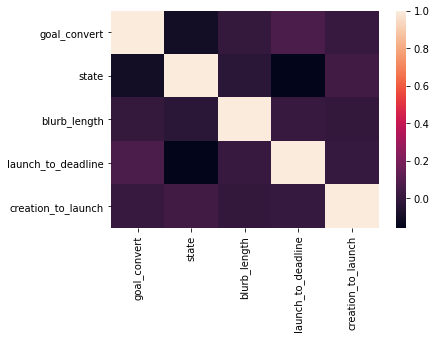

In [116]:
sns.heatmap(cor_test)

In [117]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_object]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(df_object)
encode_df

,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_displayable_name_Australia,country_displayable_name_Austria,country_displayable_name_Belgium,country_displayable_name_Canada,country_displayable_name_Denmark,country_displayable_name_France,country_displayable_name_Germany,country_displayable_name_Hong Kong,country_displayable_name_Ireland,country_displayable_name_Italy,country_displayable_name_Japan,country_displayable_name_Luxembourg,country_displayable_name_Mexico,country_displayable_name_New Zealand,country_displayable_name_Norway,country_displayable_name_Singapore,country_displayable_name_Spain,country_displayable_name_Sweden,country_displayable_name_Switzerland,country_displayable_name_the Netherlands,country_displayable_name_the United Kingdom,country_displayable_name_the United States,launch_time_10am-12pm,launch_time_10pm-12am,launch_time_12am-2am,launch_time_12pm-2pm,launch_time_2am-4am,launch_time_2pm-4pm,launch_time_4am-6am,launch_time_4pm-6pm,launch_time_6am-8am,launch_time_6pm-8pm,launch_time_8am-10am,launch_time_8pm-10pm,deadline_time_10am-12pm,deadline_time_10pm-12am,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143393,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
143395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [118]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_object,1)
df

,goal_convert,state,blurb_length,launch_to_deadline,creation_to_launch,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_displayable_name_Australia,country_displayable_name_Austria,country_displayable_name_Belgium,country_displayable_name_Canada,country_displayable_name_Denmark,country_displayable_name_France,country_displayable_name_Germany,country_displayable_name_Hong Kong,country_displayable_name_Ireland,country_displayable_name_Italy,country_displayable_name_Japan,country_displayable_name_Luxembourg,country_displayable_name_Mexico,country_displayable_name_New Zealand,country_displayable_name_Norway,country_displayable_name_Singapore,country_displayable_name_Spain,country_displayable_name_Sweden,country_displayable_name_Switzerland,country_displayable_name_the Netherlands,country_displayable_name_the United Kingdom,country_displayable_name_the United States,launch_time_10am-12pm,launch_time_10pm-12am,launch_time_12am-2am,launch_time_12pm-2pm,launch_time_2am-4am,launch_time_2pm-4pm,launch_time_4am-6am,launch_time_4pm-6pm,launch_time_6am-8am,launch_time_6pm-8pm,launch_time_8am-10am,launch_time_8pm-10pm,deadline_time_10am-12pm,deadline_time_10pm-12am,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,1000.00,1,11,15,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1000.00,1,16,33,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1000.00,1,23,30,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000.00,1,18,20,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1000.00,1,14,22,325,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143392,9000000.00,0,4,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143393,9000000.00,0,15,30,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143394,9000000.00,0,21,60,69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [119]:
# see all columns to compare to the app model
pd.set_option('display.max_columns', None)
df

,goal_convert,state,blurb_length,launch_to_deadline,creation_to_launch,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_displayable_name_Australia,country_displayable_name_Austria,country_displayable_name_Belgium,country_displayable_name_Canada,country_displayable_name_Denmark,country_displayable_name_France,country_displayable_name_Germany,country_displayable_name_Hong Kong,country_displayable_name_Ireland,country_displayable_name_Italy,country_displayable_name_Japan,country_displayable_name_Luxembourg,country_displayable_name_Mexico,country_displayable_name_New Zealand,country_displayable_name_Norway,country_displayable_name_Singapore,country_displayable_name_Spain,country_displayable_name_Sweden,country_displayable_name_Switzerland,country_displayable_name_the Netherlands,country_displayable_name_the United Kingdom,country_displayable_name_the United States,launch_time_10am-12pm,launch_time_10pm-12am,launch_time_12am-2am,launch_time_12pm-2pm,launch_time_2am-4am,launch_time_2pm-4pm,launch_time_4am-6am,launch_time_4pm-6pm,launch_time_6am-8am,launch_time_6pm-8pm,launch_time_8am-10am,launch_time_8pm-10pm,deadline_time_10am-12pm,deadline_time_10pm-12am,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,1000.00,1,11,15,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1000.00,1,16,33,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1000.00,1,23,30,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000.00,1,18,20,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1000.00,1,14,22,325,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143392,9000000.00,0,4,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143393,9000000.00,0,15,30,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143394,9000000.00,0,21,60,69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [120]:
# this creates a random 600 rows to test with the model
df_test= df.drop(columns=['state'])
sample = df_test.sample(n=600)
sample.to_csv( "df_test.csv", index=False)

In [121]:
# Split our preprocessed data into our features and target arrays
y = df["state"].values
X = df.drop(["state"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [122]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [123]:
# the model takes 65 inputs
len(X_train_scaled[0])

65

In [124]:
# Define the model - deep neural net
#inputs = 65
#layer one = (2x inputs)
#layer two = (2x inputs)
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features*2
hidden_nodes_layer2 = number_input_features*2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
3361/3361 [==============================] - 2s 739us/step - loss: 0.5989 - accuracy: 0.6806
Epoch 2/50
3361/3361 [==============================] - 2s 740us/step - loss: 0.5747 - accuracy: 0.7001
Epoch 3/50
3361/3361 [==============================] - 2s 733us/step - loss: 0.5641 - accuracy: 0.7072
Epoch 4/50
3361/3361 [==============================] - 2s 682us/step - loss: 0.5582 - accuracy: 0.7118
Epoch 5/50
3361/3361 [==============================] - 2s 686us/step - loss: 0.5544 - accuracy: 0.7138
Epoch 6/50
3361/3361 [==============================] - 2s 708us/step - loss: 0.5509 - accuracy: 0.7170
Epoch 7/50
3361/3361 [==============================] - 2s 716us/step - loss: 0.5474 - accuracy: 0.7201
Epoch 8/50
3361/3361 [==============================] - 2s 725us/step - loss: 0.5444 - accuracy: 0.7212
Epoch 9/50
3361/3361 [==============================] - 3s 752us/step - loss: 0.5416 - accuracy: 0.7221
Epoch 10/50
3361/3361 [==============================] - 2s 708u

In [125]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1121/1121 - 0s - loss: 0.6730 - accuracy: 0.6911
Loss: 0.672956109046936, Accuracy: 0.6911296844482422


the model shows somes sign of overfitting. 75.58% on training data vs 70% on the test data

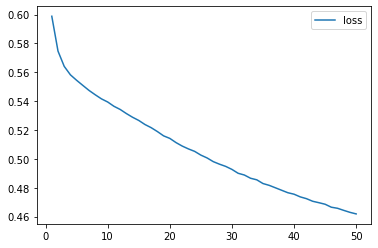

In [126]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

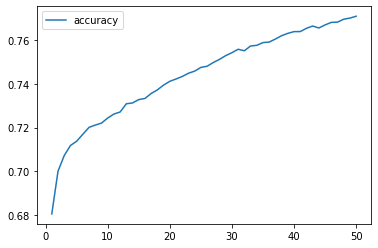

In [127]:
# Plot the loss
history_df.plot(y="accuracy")

In [128]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.613


In [129]:
#logistic regression model is not for us. too low

In [130]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(max_depth=35, min_samples_split=0.001, n_estimators=400)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.722


we are going to use random forest as it has an almost 73% accuracy


In [90]:
# this shows more RF info of our model.
best_rf = RandomForestClassifier(max_depth=35, min_samples_split=0.001, n_estimators=400)

best_rf.fit(X_train, y_train)

rf_y_hat_train2 = best_rf.predict(X_train)
rf_y_hat_test2 = best_rf.predict(X_test)

print("Random Forest score for training set:", round(best_rf.score(X_train, y_train),5))
print("Random Forest score for test set:", round(best_rf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, rf_y_hat_test2))

Random Forest score for training set: 0.75498
Random Forest score for test set: 0.72627

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.56      0.63     18114
           1       0.73      0.84      0.78     25798

    accuracy                           0.73     43912
   macro avg       0.72      0.70      0.71     43912
weighted avg       0.72      0.73      0.72     43912



Feature: 0, Score: 0.25357
Feature: 1, Score: 0.03684
Feature: 2, Score: 0.12026
Feature: 3, Score: 0.18297
Feature: 4, Score: 0.00629
Feature: 5, Score: 0.02264
Feature: 6, Score: 0.01463
Feature: 7, Score: 0.00521
Feature: 8, Score: 0.00615
Feature: 9, Score: 0.00375
Feature: 10, Score: 0.00701
Feature: 11, Score: 0.06455
Feature: 12, Score: 0.00920
Feature: 13, Score: 0.01744
Feature: 14, Score: 0.01471
Feature: 15, Score: 0.01491
Feature: 16, Score: 0.01483
Feature: 17, Score: 0.05167
Feature: 18, Score: 0.00311
Feature: 19, Score: 0.00281
Feature: 20, Score: 0.00148
Feature: 21, Score: 0.00125
Feature: 22, Score: 0.00271
Feature: 23, Score: 0.00140
Feature: 24, Score: 0.00209
Feature: 25, Score: 0.00305
Feature: 26, Score: 0.00324
Feature: 27, Score: 0.00138
Feature: 28, Score: 0.00660
Feature: 29, Score: 0.00097
Feature: 30, Score: 0.00014
Feature: 31, Score: 0.00570
Feature: 32, Score: 0.00125
Feature: 33, Score: 0.00113
Feature: 34, Score: 0.00084
Feature: 35, Score: 0.00253
Fe

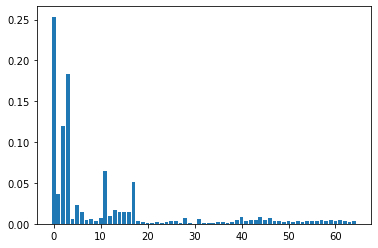

In [91]:
# get feature importances
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [92]:
print(rf_model.predict(X_test))

[0 0 0 ... 0 0 0]


In [32]:
#pickle the model
import pickle
pickle.dump(rf_model, open("model.pkl","wb"))